In [1]:

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [2]:

# Check data

data = pd.read_csv('dataset.csv')
data = data.iloc[:,1:]
data.head()

,user_id,adopted,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_month,last_year,first_month,first_year,active_days,provider
0,1,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,4,2014,4,2014,0,yahoo.com
1,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,3,2014,11,2013,136,gustr.com
2,3,0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,3,2013,3,2013,0,gustr.com
3,4,0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,5,2013,5,2013,1,yahoo.com
4,5,0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,1,2013,1,2013,5,yahoo.com


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     8823 non-null   int64  
 1   adopted                     8823 non-null   int64  
 2   creation_time               8823 non-null   object 
 3   name                        8823 non-null   object 
 4   email                       8823 non-null   object 
 5   creation_source             8823 non-null   object 
 6   last_session_creation_time  8823 non-null   object 
 7   opted_in_to_mailing_list    8823 non-null   int64  
 8   enabled_for_marketing_drip  8823 non-null   int64  
 9   org_id                      8823 non-null   int64  
 10  invited_by_user_id          8823 non-null   float64
 11  last_month                  8823 non-null   int64  
 12  last_year                   8823 non-null   int64  
 13  first_month                 8823 

In [4]:
y = data['adopted']

In [5]:
data.columns

Index(['user_id', 'adopted', 'creation_time', 'name', 'email',
       'creation_source', 'last_session_creation_time',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'last_month', 'last_year', 'first_month',
       'first_year', 'active_days', 'provider'],
      dtype='object')

# One hot encode categorical data

In [6]:
# Keep categorical variables determined to be highly predictive
categorical = data[['creation_source',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 
                    'provider', 'invited_by_user_id']]

In [7]:
numeric = data[['last_month', 'last_year', 'first_month',
       'first_year', 'active_days']]

In [8]:

# One-hot encode all features in training set.
categorical = pd.get_dummies(categorical, drop_first=True)
categorical.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,provider_gmail.com,provider_gustr.com,provider_hotmail.com,provider_jourrapide.com,provider_mumdc.com,provider_not top 10,provider_oqpze.com,provider_xvnbr.com,provider_xybhi.com,provider_yahoo.com
0,1,0,11,10803.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,316.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,94,1525.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,5151.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,193,5240.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [9]:
# Combine features to create the feature matrix
# Due to the considerable class imbalance we will select a random forest classification model

X = pd.concat([categorical, numeric], axis=1).reindex(categorical.index)
X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,provider_gmail.com,provider_gustr.com,...,provider_not top 10,provider_oqpze.com,provider_xvnbr.com,provider_xybhi.com,provider_yahoo.com,last_month,last_year,first_month,first_year,active_days
0,1,0,11,10803.0,0,0,0,0,0,0,...,0,0,0,0,1,4,2014,4,2014,0
1,0,0,1,316.0,1,0,0,0,0,1,...,0,0,0,0,0,3,2014,11,2013,136
2,0,0,94,1525.0,1,0,0,0,0,1,...,0,0,0,0,0,3,2013,3,2013,0
3,0,0,1,5151.0,0,0,0,0,0,0,...,0,0,0,0,1,5,2013,5,2013,1
4,0,0,193,5240.0,0,0,0,0,0,0,...,0,0,0,0,1,1,2013,1,2013,5


# Train Test Split

In [10]:
# 10% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, 
                                                    random_state=123, stratify=y)

In [11]:
print('X_train: ', len(X_train))
print('y_train: ', len(y_train))


X_train:  7940
y_train:  7940


In [12]:

# Approx 10% for val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11, 
                                                  random_state=123, stratify=y_train)

In [13]:
print('X_train: ', len(X_train))
print('y_train: ', len(y_train))
print('X_val: ', len(X_val))
print('y_val: ', len(y_val))
print('X_test: ', len(X_test))
print('y_test: ', len(y_test))

X_train:  7066
y_train:  7066
X_val:  874
y_val:  874
X_test:  883
y_test:  883


In [14]:
#fit scaler with training data and apply it to train, val and test data 

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_val_scaled=scaler.transform(X_val)
X_test_scaled=scaler.transform(X_test)

In [15]:
# Set up parameters for Grid Search

# Number of trees in random forest
n_estimators = [400, 500, 600, 700]
# Maximum number of levels in tree
max_depth = [5, 10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10, 15, 20, 25]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
params = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(params)

{'bootstrap': [True, False],
 'max_depth': [5, 10, 15, 20],
 'min_samples_leaf': [10, 15, 20, 25],
 'n_estimators': [400, 500, 600, 700]}


In [16]:

# Fit model to training data


from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(class_weight='balanced_subsample')

rf_random = GridSearchCV(estimator = rf, param_grid = params, cv = 10, n_jobs = -1)

rf_random.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                  

# Validation Results

In [17]:
from sklearn.metrics import accuracy_score

best_random = rf_random.best_estimator_

y_pred = best_random.predict(X_val_scaled)
y_pred_prob = best_random.predict_proba(X_val_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_val, y_pred)
ac

0.9576659038901602

In [18]:

class_names = ['Not Adopted', 'Adopted']

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 Not Adopted       0.99      0.96      0.97       731
     Adopted       0.82      0.96      0.88       143

    accuracy                           0.96       874
   macro avg       0.90      0.96      0.93       874
weighted avg       0.96      0.96      0.96       874



Confusion matrix, without normalization
[[700  31]
 [  6 137]]
Normalized confusion matrix
[[0.96 0.04]
 [0.04 0.96]]


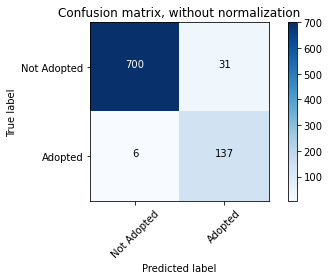

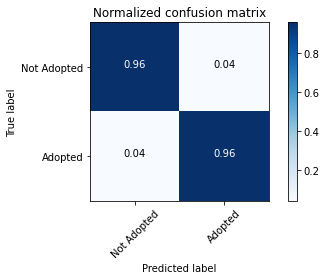

In [20]:

# confusion matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")

# Testing Results

In [21]:
from sklearn.metrics import accuracy_score

best_random = rf_random.best_estimator_

y_pred = best_random.predict(X_test_scaled)
y_pred_prob = best_random.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)
ac

0.9592298980747452

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 Not Adopted       0.99      0.96      0.98       738
     Adopted       0.84      0.93      0.88       145

    accuracy                           0.96       883
   macro avg       0.91      0.95      0.93       883
weighted avg       0.96      0.96      0.96       883



Confusion matrix, without normalization
[[712  26]
 [ 10 135]]
Normalized confusion matrix
[[0.96 0.04]
 [0.07 0.93]]


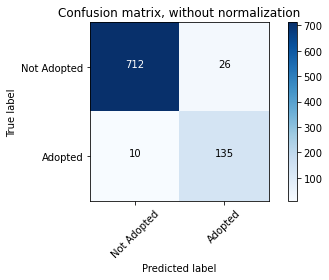

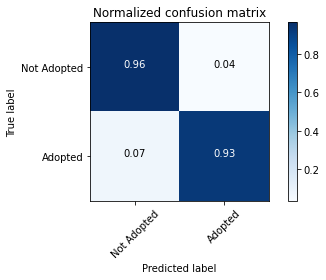

In [23]:

# confusion matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")

# Feature Importances

23


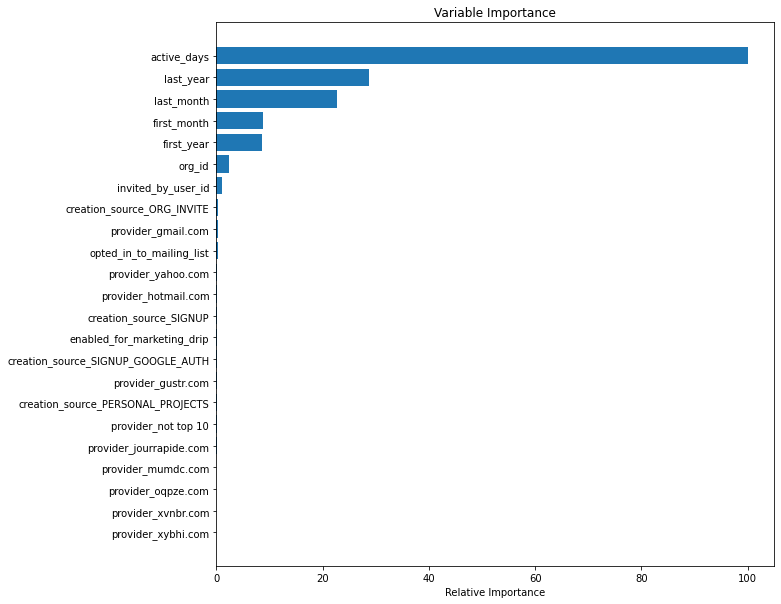

In [24]:

feature_importance = best_random.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()